# SEQ 1D

Schrödinger equation is given as:

$$
(-\frac{1}{2m} \frac{d^2}{d^2 x}  - \frac{Ze^2}{x - d}) \Psi(x) = E \Psi(x) 
$$

$$
\frac{d^2 \Psi(x)}{d^2 x} = \frac{\Psi(x+1) - 2\Psi(x) + \Psi(x-1)}{\Delta x^2}  
$$


$$
-\frac{1}{2m}\frac{\Psi(x+1) - 2\Psi(x) + \Psi(x-1)}{\Delta x^2} - \hat{V}(x)\Psi(x) = E \Psi(x)  
\\
\\
$$
Let's consider the following boundary conditions:
$$
\Psi(0) = \Psi(N) = 0
$$

Then Schrödinger equation will take the following form:
$$
\begin{pmatrix}
-\frac{1}{m \Delta x^2} - \hat{V}(x_1)  &  -\frac{1}{2m \Delta x^2} & 0 & ... & 0 & 0 \\ 
-\frac{1}{2m \Delta x^2} &   -\frac{1}{m \Delta x^2} - \hat{V}(x_2) & -\frac{1}{2m \Delta x^2} & ... & 0 & 0 \\
...  &  ... & ... & ... & ... \\ 
0 & 0 & ... &-\frac{1}{2m \Delta x^2} &   -\frac{1}{m \Delta x^2} - \hat{V}(x_{N})  \\
\end{pmatrix} 
\begin{pmatrix}
\Psi(x_1) \\
\Psi(x_2) \\
...  \\
\Psi(x_{N-1}\\
\end{pmatrix} 
= E 
\begin{pmatrix}
\Psi(x_1) \\
\Psi(x_2) \\
...  \\
\Psi(x_{N-1}\\
\end{pmatrix}
$$

In [27]:
import numpy as np
import matplotlib.pylab as plt
from scipy.linalg import eigh_tridiagonal



def get_potential(x,Zval):
    V = -14.3948*(Zval/(abs(x  - 4) + 0.01)) # we multiply to 14.3948  to convert to eV
#     V = 100*x**2
    return V


N = 10
L = 10
Zval = 0.8 # effective charge
m = 0.02   # effective mass

x = np.logspace(np.log10(1), np.log10(L), N+1, dtype=float) # in Ang

dx = np.zeros(N)

for i in range(N):
    dx[i] = x[i+1] - x[i]  
    
    


V  = get_potential(x,Zval)


d = np.zeros(N-1)
e = np.zeros(N-2)

for i in range(N-1):
    d[i] = -1/(m * dx[i]*dx[i+1]) + V[i+1]
    
for i in range(N-2):
    e[i] = -1/(2*m * dx[i]*dx[i+1])
    
print(x)
print(d)

# eigenvalues, eigenvectors = eigh_tridiagonal(d,e)

# eigenvectors = eigenvectors.T

# for i in range(1):
#     plt.plot(x[1:-1],eigenvectors[i]**2, label=f'{i}')
#     plt.legend()

[ 1.          1.25892541  1.58489319  1.99526231  2.51188643  3.16227766
  3.98107171  5.01187234  6.30957344  7.94328235 10.        ]
[-596.59358565 -378.53254423 -241.5575318  -156.49296595 -107.47473203
 -457.32299533  -48.64774826  -28.54881     -17.79358913]


Text(0.5, 0, 'Eigenstates')

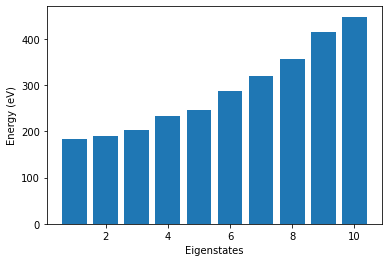

In [40]:
plt.bar(np.arange(1,11,1), eigenvalues[1:11]- eigenvalues[0])
plt.ylabel('Energy (eV)')
plt.xlabel('Eigenstates')